# Esercitazione 5: Algoritmo di Metropolis e funzione d'onda dell'idrogeno

Uso l'algoritmo di Metropolis per campionare la distribuzione di probabilità $|\Psi_{n,l,m}(r,\theta,\phi)|^2$ associata alla funzione d'onda dell'idrogeno 
$$
\Psi_{n,l,m}(r,\theta,\phi)=
\sqrt{\left(\frac{2}{na_0}\right)^3 \frac{(n-l-1)!}{2n[(n+l)!]}}
e^{-r/na_0}\left(\frac{2r}{na_0}\right)^l L_{n-l-1}^{2l+1}\left(\frac{2r}{na_0}\right)
Y_l^m(\theta,\phi)
$$

e calcolare il raggio medio dell'atomo $<r_0>$ in unità di $a_0$
(con $a_0$=1) e numeri quantici 
- $n=1,l=0,m=0$
- $n=2,l=1,m=0$

L'algoritmo di Metropolis è un processo stocastico di Markov in cui viene proposto un nuovo stato sulla base di una probabilità di transizione $T(\vec{x}|\vec{y})$ e poi accettato o rifiutato. 
L'algoritmo garantisce che, nel limite asintotico, la distribuzione di probabilità $d(\vec{x})$ dei punti $\vec{x}$ associati al random walk definito dall'algoritmo, converge alla distribuzione desiderata $p(\vec{x})$
$$
\lim_{n\rightarrow \infty}d_n(\vec{x})=p(\vec{x})
$$

È quindi possibile costruire una catena di markov che converge asintoticamente ad un unica distribuzione di probabilità $p(\vec{x})$ a partire dalla funzione di kernel $K(\vec{x}|\vec{y})$ tale che 
$$
p(\vec{x})=\int K(\vec{x}|\vec{y}) p(\vec{y})d\vec{y}
$$

a patto che $K$ soddisfi le proprietà di regolarità e ergodicità. 
L'algoritmo di Metropolis propone una funzione K(\vec{x}|\vec{y}) sfruttando il bilancio dettagliato $K(\vec{x}|\vec{y}) p(\vec{y})=K(\vec{y}|\vec{x}) p(\vec{x})$ e scomponendo $K$ nel prodotto della probabilità di transizione $T$ per la probabilità di accettazione $A$
$$
K(\vec{x}|\vec{y}) =T(\vec{x}|\vec{y})A(\vec{x}|\vec{y}) 
$$

in cui 
$$
A(\vec{x}|\vec{y})=min\Bigl\{1,\frac{T(\vec{y}|\vec{x})p(\vec{x})}{T(\vec{x}|\vec{y})p(\vec{y})}\Bigr\}
$$

e $T(\vec{x}|\vec{y})$ è una qualunque probabilità di transizione. 


Nel nostro caso useremo due probabilità di transizione in cui la lunghezza del passo viene scelta in modo da rispettare la regola empirica di accettazione $\alpha=50\%$ 
- Uniforme di passo $l=1.2$ e $\alpha=50.24\%$ per numero quantici $\{1,0,0\}$ e con passo $l=0.7$ e $\alpha=53.35\%$ per numero quantici $\{2,1,0\}$

- Gaussiano di deviazione standard $l=2.8$ e $\alpha=52.16\%$ per numero quantici $\{1,0,0\}$ e con passo $l=1.6$ e $\alpha=54.64\%$ per numero quantici $\{2,1,0\}$

Si ricorda che le lunghezze sono espresse in unità di $a_0$

In [2]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math
import scipy.optimize as opt
from mpl_toolkits.mplot3d import Axes3D

-------------------

# Campionamento di  $|\psi_{1,0,0}|^2$

$<r_0>_{\psi_{1,0,0}}=\frac{3}{2}a_0$

### Equilibrazione


Fase di equilibrazione con $N_{step}=250$. È necessaria per campionare in modo corretto la distribuzione di probabilità. Se infatti scegliamo come punto di partenza un punto molto lontano dalla regione in cui è concentrata la distribuzione, quest'ultima non verrà campionata in modo corretto e omogeneo, ovviamente a meno di cambiare il numero di step necessari per equilibrare il sistema. Più grande è la distanza dalla regione da campionare e maggiore sarà il numero di step necessario per equilibrare il sistema

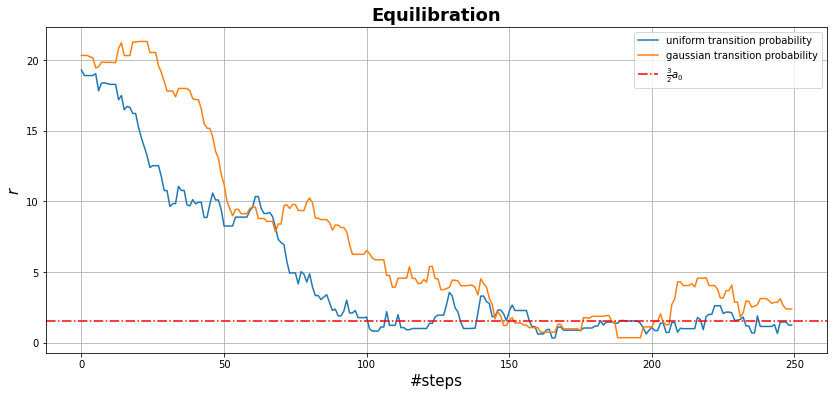

In [2]:
file=open('output/equilibrationMR100.dat')
r_equilib=np.loadtxt(file)

file=open('output/equilibrationMR100_gauss.dat')
r_gauss_equilib=np.loadtxt(file)


plt.figure(figsize=(14,6))
plt.plot(r_equilib,label='uniform transition probability')
plt.plot(r_gauss_equilib,label='gaussian transition probability')
plt.xlabel('#steps',fontsize=15)
plt.ylabel(r'$r$', fontsize=15)
plt.title('Equilibration', fontsize=18, fontweight='bold')
plt.axhline(1.5, color='r', ls='-.', label=r'$\frac{3}{2} a_0$')
plt.grid(True)
plt.legend()
plt.show()

Si osserva come per entrambe le funzioni di transizione il sistema si equilibra intorno alla posizione prestabilita

### Media a blocchi

Per la media a blocchi usiamo numero di step totali $M=5x10^6$ e numero di blocchi $N=100$

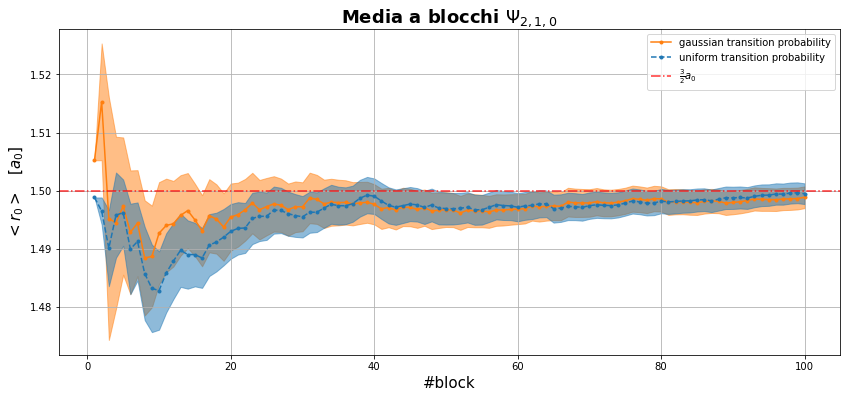

In [20]:
N_block=100

file=open('output/r_mean_100.out')
x_r,r,err_r=np.loadtxt(file, delimiter=",", usecols=[0,1,2], unpack=True)

file=open('output/r_mean_100_gauss.out')
x_r_gauss,r_gauss,err_r_gauss=np.loadtxt(file, delimiter=",", usecols=[0,1,2], unpack=True)

plt.figure(figsize=(14,6))
plt.plot(x_r_gauss/(np.max(x_r_gauss)/N_block), r_gauss,'.', ls='-', color="tab:orange", label='gaussian transition probability')
plt.fill_between(x_r_gauss/(np.max(x_r_gauss)/N_block),r_gauss+err_r_gauss, r_gauss-err_r_gauss, alpha=0.5,color="tab:orange")
plt.plot(x_r/(np.max(x_r)/N_block), r,'.',color="tab:blue", label='uniform transition probability', ls='--')
plt.fill_between(x_r/(np.max(x_r)/N_block),r+err_r, r-err_r, alpha=0.5,color="tab:blue")

plt.xlabel('#block',fontsize=15)
plt.ylabel(r'$<r_0> \quad [a_0]$',fontsize=15)
plt.title(r'Media a blocchi $\Psi_{2,1,0}$',  fontsize=18, fontweight='bold')
plt.axhline(1.5, color='r', ls='-.', alpha=0.8, label=r'$\frac{3}{2} a_0$')
plt.grid(True)
plt.legend()
plt.show()

La media a blocchi mostra come il calcolo del raggio medio nello stato quantico $n=1,l=0,m=0$, ottenuto campionando la distribuzione di probabilità con l'algoritmo metropolis risulta consistente con il valore teorico atteso. Inoltre si osserva che il risultato è consistente per entrambe le funzioni di transizione.

-----------------

# Campionamento di $|\psi_{2,1,0}|^2$

$<r_0>_{\psi_{2,1,0}}=5 a_0$

### Equilibrazione

Fase di equilibrazione $N_{step}=250$

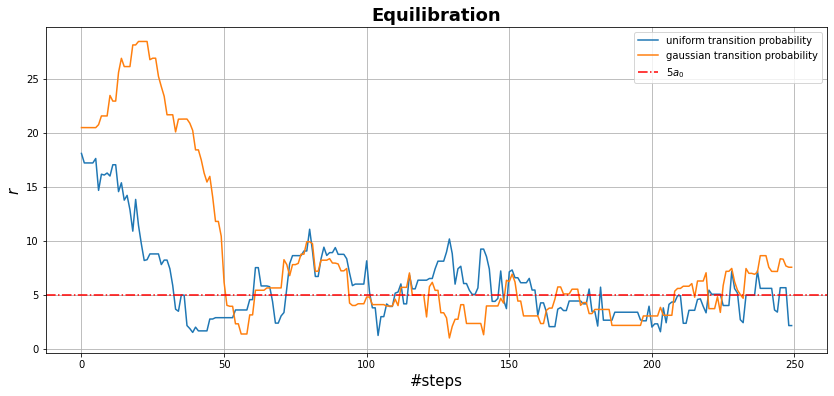

In [15]:
file=open('output/equilibrationMR210.dat')
r_equilib=np.loadtxt(file)

file=open('output/equilibrationMR210_gauss.dat')
r_gauss_equilib=np.loadtxt(file)


plt.figure(figsize=(14,6))
plt.plot(r_equilib,label='uniform transition probability')
plt.plot(r_gauss_equilib,label='gaussian transition probability')
plt.xlabel('#steps',fontsize=15)
plt.ylabel(r'$r$', fontsize=15)
plt.title('Equilibration', fontsize=18, fontweight='bold')
plt.axhline(5, color='r', ls='-.', label=r'$5 a_0$')
plt.grid(True)
plt.legend()
plt.show()

Anche in questo caso si osserva dopo un sufficiente numero di step il sistema ha equilibrato

### Media a blocchi

Anche in questo caso usiamo $M=5x10^6$ passi totali e $N=100$ numero di blocchi

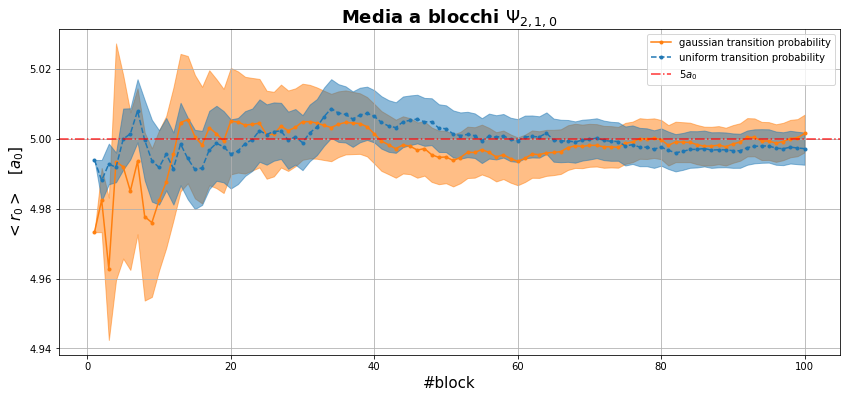

In [19]:
N_block=100

file=open('output/r_mean_210.out')
x_r,r,err_r=np.loadtxt(file, delimiter=",", usecols=[0,1,2], unpack=True)

file=open('output/r_mean_210_gauss.out')
x_r_gauss,r_gauss,err_r_gauss=np.loadtxt(file, delimiter=",", usecols=[0,1,2], unpack=True)

plt.figure(figsize=(14,6))
plt.plot(x_r_gauss/(np.max(x_r_gauss)/N_block), r_gauss,'.', ls='-', color="tab:orange", label='gaussian transition probability')
plt.fill_between(x_r_gauss/(np.max(x_r_gauss)/N_block),r_gauss+err_r_gauss, r_gauss-err_r_gauss, alpha=0.5,color="tab:orange")
plt.plot(x_r/(np.max(x_r)/N_block), r,'.',color="tab:blue", label='uniform transition probability', ls='--')
plt.fill_between(x_r/(np.max(x_r)/N_block),r+err_r, r-err_r, alpha=0.5,color="tab:blue")
plt.xlabel('#block',fontsize=15)
plt.ylabel(r'$<r_0> \quad [a_0]$',fontsize=15)
plt.title(r'Media a blocchi $\Psi_{2,1,0}$',  fontsize=18, fontweight='bold')
plt.axhline(5, color='r', ls='-.', alpha=0.8, label=r'$5 a_0$')
plt.grid(True)
plt.legend()
plt.show()

La media a blocchi mostra come il calcolo del raggio medio nello stato quantico $n=1,l=0,m=0$, ottenuto campionando la distribuzione di probabilità con una catena di markov risulta consistente con il valore teorico atteso. Inoltre si osserva che il risultato è consistente per entrambe le funzioni di transizione.

### Visualizzazione grafica della funzione d'onda

Mostro di seguito il campionamento delle distribuzioni di probabilità $|\Psi_{1,0,0}(r,\theta,\phi)|^2$ e $|\Psi_{2,1,0}(r,\theta,\phi)|^2$, ottenute salvando la posizione della Markov chain, nel caso di probabilità di transizione uniforme, ogni 100 step (per non rendere l'immagine 3D troppo pesante da generare). 

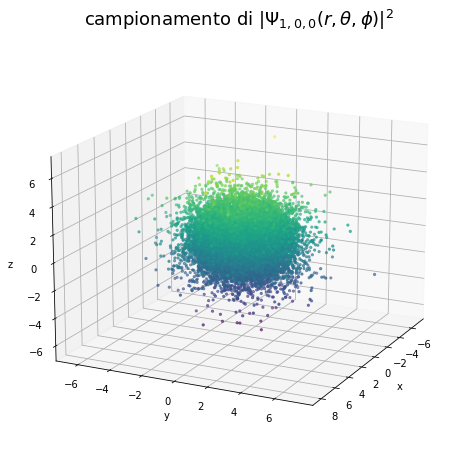

In [3]:
#%matplotlib widget

file=open('output/x_out_100.out')
x,y,z=np.loadtxt(file, delimiter=",", usecols=[0,1,2], unpack=True)

fig = plt.figure(figsize=(14,6))
ax = Axes3D(fig)
ax.scatter(x, y, z, c=z, marker='.')
ax.set_title(r'campionamento di $|\Psi_{1,0,0}(r,\theta,\phi)|^2$', fontsize=18)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.view_init(17, 26)
plt.show()

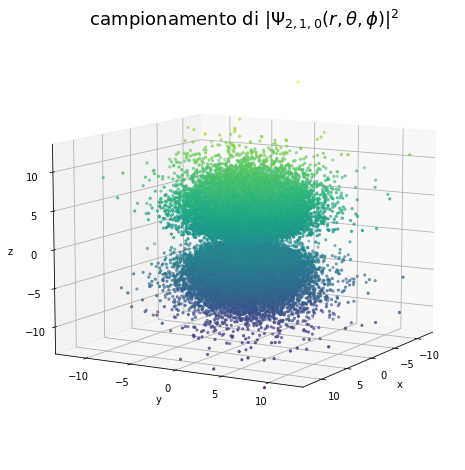

In [6]:
#%matplotlib widget

file=open('output/x_out_210.out')
x,y,z=np.loadtxt(file, delimiter=",", usecols=[0,1,2], unpack=True)

fig = plt.figure(figsize=(14,6))
ax = Axes3D(fig)
ax.scatter(x, y, z, c=z, marker='.')
ax.set_title(r' campionamento di $|\Psi_{2,1,0}(r,\theta,\phi)|^2$', fontsize=18)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_xlim(-13,13)
ax.set_ylim(-13,13)
ax.set_zlim(-13,13)
ax.view_init(10, 30)
plt.show()